# Nonparametric Methods
- **Parametic**. The probability distribution has specific functional forms governed by a small number of parameters whose values are to be determined from a data set.
- **Nonparametric**. Make few assumptions about the form of the distribution. Here we shall focus mainly on simple frequentist method. 

In the subsequent discussion, we will use 3 different kinds of nonparametric method to estimate the density of an observation which is generated by a mixture of two Gaussians.

## Histogram density extimation
Histogram insists of a numbers of bins which is in general shown as bars in the coordinate. As we will see, the histogram has several factors.  
- $x$. The input axis. Input of a histogram is an array of constant, say $[x_1, \cdots, x_n]$. Each element of the array represents a single point on the axis.
- $y$. The density axis. Output of a histogram is the densities of each segment. When the array is counted, the x-axis will firstly be partitioned into serveral segments $\Delta_1,\cdots,\Delta_N$, then the following expression is using to evaluate the density of each segment.
$$p_i = \frac{n_i}{N\Delta_i} \tag{2.241}$$
- $\Delta_i$. The width of segment $i$. Normally the width of each segment is the same. $\Delta_1=\cdots=\Delta_N=\Delta$.
- $N$. The amount of elements in the array.
- $n_i$. The quantities of the elements that lies on the $ith$ segment. 

From the density equation, we can see that $\frac{n_i}{N}$ represents the proportion of the elements lying on the $ith$ segment in the whole array. Then this proportion devides by the segment width $\Delta_i$ to get the density.

#### Advantages
- We can compute the histogram within a range, which means that the data set can be discarded. This is useful if the data set is large.

#### Disadvantages
- Histogram can only be visualed in one or two dimensions. 
- The density is discontinuous. 
- If we devide each variable in a $D$-dimensional space into $M$ bins, then the total number of bins will be $M^D$. Such high dimensional space needs large quantities of data to provide meaningful esimates, which is prohibitive (high dimensionality curse).

#### Choose the proper $\Delta$
From the figures below, we can see that the best result are obtained for some intermediate value of $\Delta$ (middle figure).

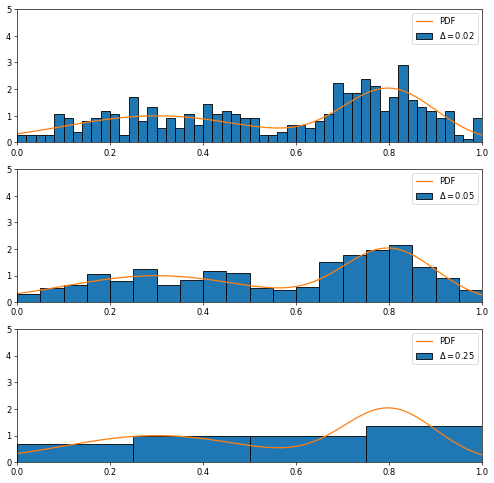

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA
import scipy

MU1 = .3
MU2 = .8
SIGMA1 = .2
SIGMA2 = .1

gaussian = lambda x,mu,s: 1.0/((2*np.pi)**.5*s)*np.exp(-1.0/(2*s**2)*(x-mu)**2)

def axes_limit(ax, hstart, hend, vstart, vend):
    ax.set_xlim(hstart, hend)
    ax.set_ylim(vstart, vend)

def main():
    fig = plt.figure(figsize=(10,10), dpi=60)
    ax1 = fig.add_subplot(3,1,1)
    ax2 = fig.add_subplot(3,1,2)
    ax3 = fig.add_subplot(3,1,3)
    
    axes_limit(ax1, 0, 1, 0, 5)
    axes_limit(ax2, 0, 1, 0, 5)
    axes_limit(ax3, 0, 1, 0, 5)
    
    s1 = np.random.normal(MU1, SIGMA1, 200)
    s2 = np.random.normal(MU2, SIGMA2, 200)
    s  = np.hstack((s1, s2))

    ax1.hist(s, bins=50, range=(0,1), density=1, color='C0', edgecolor="k", label=r"$\Delta=0.02$")
    ax2.hist(s, bins=20, range=(0,1), density=1, color='C0', edgecolor="k", label=r"$\Delta=0.05$")
    ax3.hist(s, bins=4, range=(0,1), density=1, color='C0', edgecolor="k", label=r"$\Delta=0.25$")

    
    x = np.linspace(0,1, 100)
    y = (gaussian(x, MU1, SIGMA1) + gaussian(x, MU2, SIGMA2))/2
    ax1.plot(x,y, label=r"PDF", color='C1')
    ax2.plot(x,y, label=r"PDF", color='C1')
    ax3.plot(x,y, label=r"PDF", color='C1')
    ax1.legend()
    ax2.legend()
    ax3.legend()
    
    plt.show()

if __name__=="__main__":
    main()

-----------
## Kernel density extimators

### Probability of a region
Consider an unknown probability density $p(\mathbf{x})$ $D$-dimensional space.The probability mass associated with a small region $\mathcal{R}$ is given by
$$P = \int_{\mathcal{R}}p(\mathbf{x})d\mathbf{x} \tag{2.242}$$
Now suppose that we have collected a data set comprising $N$ observation drawn from $p(\mathbf{x})$. The total number $K$ of points that lie inside $\mathcal{R}$ will be distributed according to the binomial distribution
$$Bin(K|N, P)=\frac{N!}{K!(N-K)!}P^K(1-P)^{1-K} \tag{2.243}$$
Using the mean and the variance of the Binomial distribution, we have
$$\begin{align*}
\mathbb{E}[K]&=NP \tag{2.11}\\
var[K]&=NP(1-P) \tag{2.12}
\end{align*}$$
For large $N$, the variance will tend to zero, and so
$$K\approx NP \tag{2.244}$$
And if the region $\mathcal{R}$ is sufficiently small that the probability density $p(\mathbf{x})$ is roughly constant over the region, then we have
$$P\approx p(\mathbf{x})V \tag{2.245}$$
where $V$ is the volume of $\mathcal{R}$. Combining $(2.244)$ and $(2.245)$, we obtain our density estimate in the form
$$p(\mathbf{x})=\frac{K}{NV} 
\qquad
\left\{\begin{matrix}
N\to\ large\\ 
V\to\ small
\end{matrix}\right.
\tag{2.246}$$

### Kernel density

#### Parzen window
Assume that the region $\mathcal{R}$ is a $D$-dimensional space cube of side $h$ centered on $\mathbf{x}$, then the volume of $\mathcal{R}$ is denoted by
$$V = h^D$$
There N observations which is denoted by $\{\mathbf{x}_1,\cdots,\mathbf{x}_N\}$.  
The number of points lie inside $\mathcal{R}$ is denoted by
$$K=\sum_{n=1}^N k\left(\frac{\mathbf{x}-\mathbf{x}_n}{h}\right)\qquad k(\mathbf{u})=\left\{\begin{matrix}
1, &|u_i|\leq 1/2, &i=1,\cdots,D,\\ 
0, &otherwise
\end{matrix}\right. \tag{2.247,2.248}$$
where $k(\mathbf{u})$ is called a *Parzen window*. Substituting these expression into $(2.246)$ then gives the following result for the estimated density at $\mathbf{x}$
$$p(\mathbf{x})=\frac{1}{N}\sum_{n=1}^N\frac{1}{h^D}k\left(\frac{\mathbf{x}-\mathbf{x}_n}{h}\right) \tag{2.249}$$
where $k(\mathbf{u})$ is the *kernel function*.

<font color='red'>From the perspective of kernel function, the density of point $\mathbf{x}$ can be interpretd not as a single cube centered on $\mathbf{x}$ but as the sum over $N$ cubes centered on the $N$ data points $\mathbf{x}_n$. </font>

#### Gaussian kernel
The *Parzen window* function is a sharp edge function, and the result is a histogram. If we want a smooth probability density, we can use the Gaussian as kernel function which takes the form
$$p(\mathbf{x})=\frac{1}{N}\sum_{n=1}^N\frac{1}{(2\pi h^2)^{1/2}}exp\left\{-\frac{\|\mathbf{x}-\mathbf{x}_n\|^2}{2h^2}\right\} \tag{2.250}$$
which is a 1-D Gaussian kernel density estimator, where $h$ represents the standard deviation of the Gaussian components. <font color='red'>Thus our density model is obtained by placing a Gaussian over each observed data point and then adding up the contributions over the whole data set, and then dividing by $N$ so that the density is correctly nomalized.</font>

#### Advantadge
- All the observed data set is in the probability density estimator equation. Thus it needs no traning computation.

#### Disadvantage
- The computation of evaluating the density grows linearly with the size of the data set.

#### Choose $h$
In kernel density method, like what we do in the histogram, we can change the derivation (width) $h$ to get our best density distribution. As what is shown in the figure below, it's best for us to choose the middle kernel width $h$.

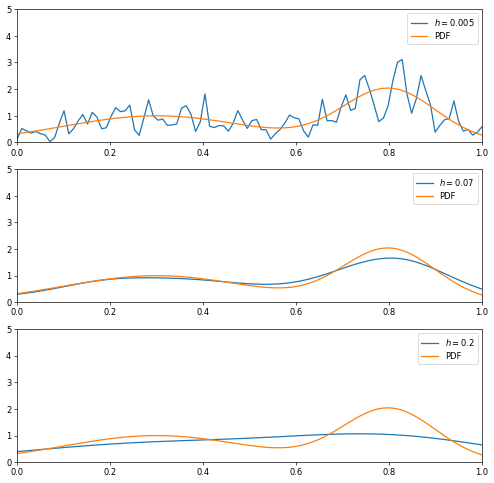

In [2]:
p = lambda x1, x2, h, N: 1.0/N * 1.0/(2*np.pi*h**2)**0.5 * np.sum(np.exp(-(x1-x2)**2/(2*h**2))) 

def kernel_density_estimators(s, h):
    N = len(s)
    x = np.linspace(0,1, 100)
    y=[]
    for xi in x:
        y = np.hstack((y, p(s, xi, h, N)))
    #print(y)
    return x,y

def main():
    fig = plt.figure(figsize=(10,10), dpi=60)
    ax1 = fig.add_subplot(3,1,1)
    ax2 = fig.add_subplot(3,1,2)
    ax3 = fig.add_subplot(3,1,3)
    
    axes_limit(ax1, 0, 1, 0, 5)
    axes_limit(ax2, 0, 1, 0, 5)
    axes_limit(ax3, 0, 1, 0, 5)
    
    s1 = np.random.normal(MU1, SIGMA1, 200)
    s2 = np.random.normal(MU2, SIGMA2, 200)
    s  = np.hstack((s1, s2))

    x1, y1 = kernel_density_estimators(s, .005)
    x2, y2 = kernel_density_estimators(s, .07)
    x3, y3 = kernel_density_estimators(s, .2)
    
    ax1.plot(x1, y1, label=r"$h=0.005$")
    ax2.plot(x2, y2, label=r"$h=0.07$")
    ax3.plot(x3, y3, label=r"$h=0.2$")
    
    x = np.linspace(0,1, 100)
    y = (gaussian(x, MU1, SIGMA1) + gaussian(x, MU2, SIGMA2))/2
    ax1.plot(x,y, label=r"PDF")
    ax2.plot(x,y, label=r"PDF")
    ax3.plot(x,y, label=r"PDF")
    ax1.legend()
    ax2.legend()
    ax3.legend()
    
    plt.show()

if __name__=="__main__":
    main()

-------------
### Problems of kernel approach
While evaluating the probability density, the kernel approach uses fixed $h$, which results in the issues below
- In regions of high data density, a large value of $h$ may lead to over-smoothing and a washing out of structure that might otherwise be extracted from the data.
- In regions of low data density, reducing $h$ may lead to noisy estimates.

------------
## Nearest-neighbour methods

To deal with the problems in kernel approach, we consider a fixed value of $K$ and use the data to find an appropriate value of $V$ instead of fixing $V$ and determining the value of $K$ from the data.  

To do this, we consider a small sphere centered on the point $\mathbf{x}$ at which we wish to estimate the density $p(\mathbf{x})$, and we allow the radius of the sphere to grow until it contains precisely $K$ data points. The estimate of the density $p(\mathbf{x})$ is then given by (2.246) with $V$ set to the volume of the resulting sphere. This technique is known as $K$ *nearest neighbours*.

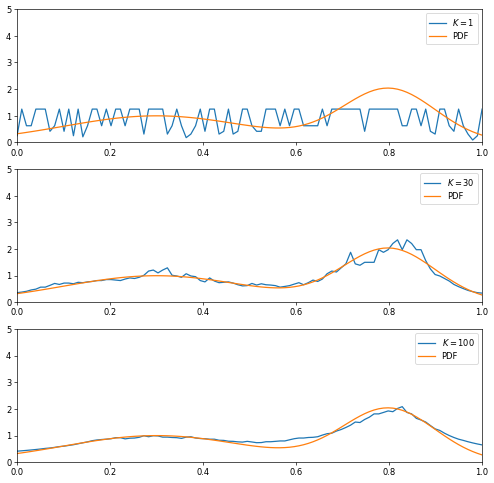

In [3]:
FACTOR = 0.001

def K_Nearest_neighbour(s, K):
    n = 1.0/FACTOR
    N = len(s)
    x = np.linspace(0,1, 100)
    y = []
    for xi in x: 
        for i in range(int(n)):
            h = FACTOR * (i+1)
            c = np.abs(xi - s)
            c[c>h]=0
            count = np.count_nonzero(c)
            if count >= K:
                break
        #Gaussian kernel
        #yi = p(s, xi, h, N)
        #p(x) = K/NV
        yi = 1.0*K/(2*h*N)
        y = np.hstack((y, yi))
    return x,y

def main():
    fig = plt.figure(figsize=(10,10), dpi=60)
    ax1 = fig.add_subplot(3,1,1)
    ax2 = fig.add_subplot(3,1,2)
    ax3 = fig.add_subplot(3,1,3)
    
    axes_limit(ax1, 0, 1, 0, 5)
    axes_limit(ax2, 0, 1, 0, 5)
    axes_limit(ax3, 0, 1, 0, 5)
    
    s1 = np.random.normal(MU1, SIGMA1, 200)
    s2 = np.random.normal(MU2, SIGMA2, 200)
    s  = np.hstack((s1, s2))

    x1, y1 = K_Nearest_neighbour(s, 1)
    x2, y2 = K_Nearest_neighbour(s, 30)
    x3, y3 = K_Nearest_neighbour(s, 100)
    
    ax1.plot(x1, y1, label=r"$K=1$")
    ax2.plot(x2, y2, label=r"$K=30$")
    ax3.plot(x3, y3, label=r"$K=100$")
    
    x = np.linspace(0,1, 100)
    y = (gaussian(x, MU1, SIGMA1) + gaussian(x, MU2, SIGMA2))/2
    ax1.plot(x,y, label=r"PDF")
    ax2.plot(x,y, label=r"PDF")
    ax3.plot(x,y, label=r"PDF")
    ax1.legend()
    ax2.legend()
    ax3.legend()
    
    plt.show()

if __name__=="__main__":
    main()

------------
## Nearest-neighbour for Classification

Suppose that we have a data set comprising $N_k$ points in class $C_k$ with $N$ points in total.
$$\sum_k N_k=N$$
If we wish to classify a new point $\mathbf{x}$, we draw a sphere centred on $\mathbf{x}$, and allow the radius of the sphere to grow until it contains precisely $K$ data points. Suppose the volume of the sphere is $V$ after having finded $K$ points surrounded.  
Then according to the Bayes' theory, (2.246) provideds an estimate of the density associated with each class inside the sphere is
$$p(\mathbf{x}|C_k)=\frac{K_k}{N_k V} \tag{2.253}$$
Similarly, the unconditional density is given by
$$p(\mathbf{x})=\frac{K}{NV} \tag{2.254}$$
while the class prior are given by
$$p(C_k)=\frac{N_k}{N} \tag{2.255}$$
Combine these equations and using Bayes' theorem to obtain the posterior probability
$$p(C_k|\mathbf{x})=\frac{p(\mathbf{x}|C_k)p(C_k)}{p(\mathbf{x})}=\frac{K_k}{K} \tag{2.256}$$
Thus we should assign new point $\mathbf{x}$ to the class of the largest $K_k$.

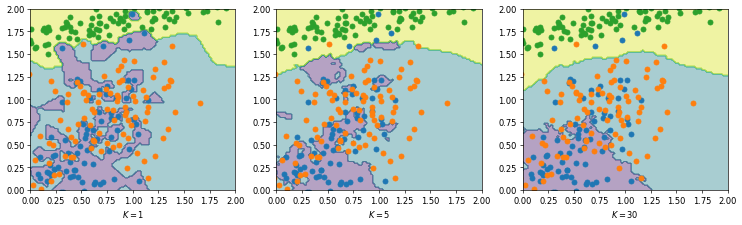

In [4]:
from collections import Counter

MU_2D_1 = [.5, .3]
MU_2D_2 = [.7, .7]
MU_2D_3 = [.7, 1.8]

SIGMA_2D_1 = [[.1, .1],
              [.1, .4]]
SIGMA_2D_2 = [[.2, .09],
              [.09, .2]]
SIGMA_2D_3 = [[.5, .1],
              [.1, .025]]

def K_Nearest_neighbour_classifier(s, c, K):
    n = 2.0/FACTOR
    N = len(s)
    x = np.linspace(0,2,100)
    y = np.linspace(0,2,100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros(X.shape)
    sx = s.T[0]
    sy = s.T[1]
    for p in range(len(y)): 
        for q in range(len(x)):
            for i in range(int(n)):
                h = FACTOR * (i+1)
                dis = (x[q] - sx)**2 + (y[p] - sy)**2
                dis[dis>(h**2)]=0
                count = np.count_nonzero(dis)
                if count >= K:
                    break
            temp = c * (dis != 0)
            ctr = Counter(temp.ravel())
            #print(ctr.most_common(2))
            # [(0, 270), (2, 20)]
            Z[p][q] = ctr.most_common(2)[1][0]
    return X, Y, Z

def main():
    fig = plt.figure(figsize=(15,4), dpi=60)
    ax1 = fig.add_subplot(1,3,1)
    ax2 = fig.add_subplot(1,3,2)
    ax3 = fig.add_subplot(1,3,3)
    
    axes_limit(ax1, 0, 2, 0, 2)
    axes_limit(ax2, 0, 2, 0, 2)
    axes_limit(ax3, 0, 2, 0, 2)
    
    s1 = np.random.multivariate_normal(MU_2D_1, SIGMA_2D_1, 100)
    s2 = np.random.multivariate_normal(MU_2D_2, SIGMA_2D_2, 100)
    s3 = np.random.multivariate_normal(MU_2D_3, SIGMA_2D_3, 100)
    s  = np.vstack((s1, s2, s3))
    
    c1 = np.full((1, s1.shape[0]), 1)
    c2 = np.full((1, s2.shape[0]), 2)
    c3 = np.full((1, s3.shape[0]), 3)
    c  = np.hstack((c1, c2, c3))

    X1, Y1, Z1 = K_Nearest_neighbour_classifier(s, c, 1)
    X2, Y2, Z2 = K_Nearest_neighbour_classifier(s, c, 5)
    X3, Y3, Z3 = K_Nearest_neighbour_classifier(s, c, 30)

    ax1.contourf(X1, Y1, Z1, alpha=.4)
    ax1.scatter(s1.T[0], s1.T[1])
    ax1.scatter(s2.T[0], s2.T[1])
    ax1.scatter(s3.T[0], s3.T[1])
    ax1.set_xlabel(r"$K=1$")
    
    ax2.contourf(X2, Y2, Z2, alpha=.4)
    ax2.scatter(s1.T[0], s1.T[1])
    ax2.scatter(s2.T[0], s2.T[1])
    ax2.scatter(s3.T[0], s3.T[1])
    ax2.set_xlabel(r"$K=5$")
    
    ax3.contourf(X3, Y3, Z3, alpha=.4)
    ax3.scatter(s1.T[0], s1.T[1])
    ax3.scatter(s2.T[0], s2.T[1])
    ax3.scatter(s3.T[0], s3.T[1])
    ax3.set_xlabel(r"$K=30$")
    
    plt.show()

if __name__=="__main__":
    main()